HOUSE PRICE PREDICTION 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv(r"C:\Users\trilo\Downloads\kc_house_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
for column in df.columns:
    print(df[column].value_counts().head())


795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
Name: id, dtype: int64
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
Name: date, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64
3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1800    129
1660    129
Name: sqft_living, dtype: int64
5000    358
6000    290
4000    251
7200    220
4800    120
Name: sqft_lot, dtype: int64
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
Name: floors, dtype: int64
0    21450
1      163
Name: waterfront, dtype: int64
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
3    14031
4     5679
5     1701
2      172
1       30
Name: condition,

C:\Users\trilo\AppData\Local\Temp\ipykernel_25984\2926546834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

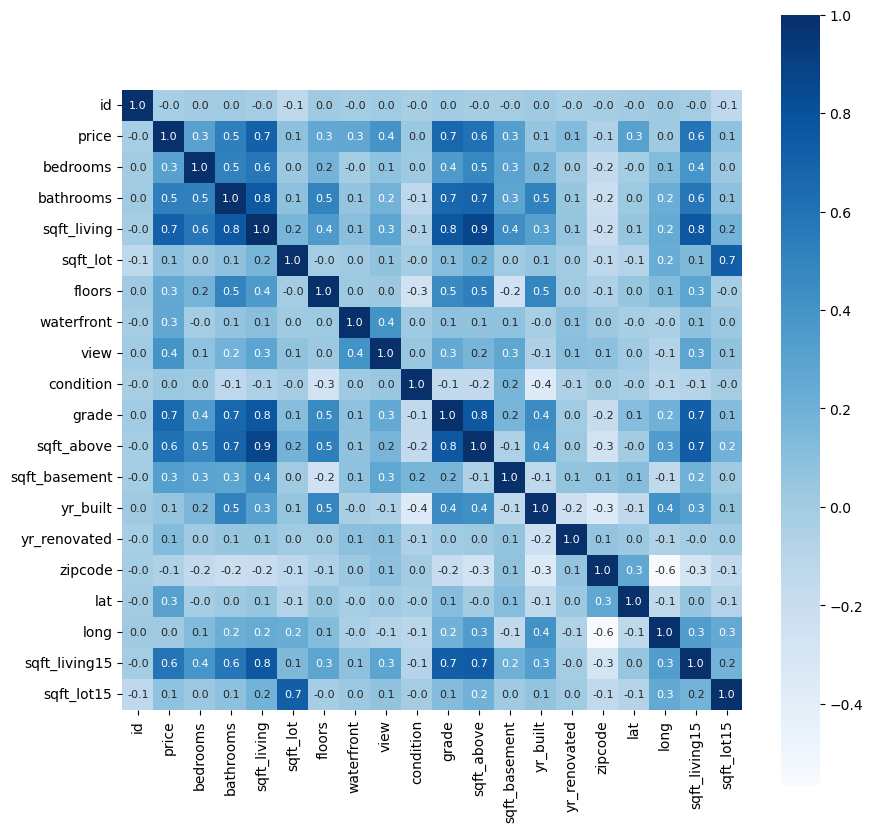

In [11]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

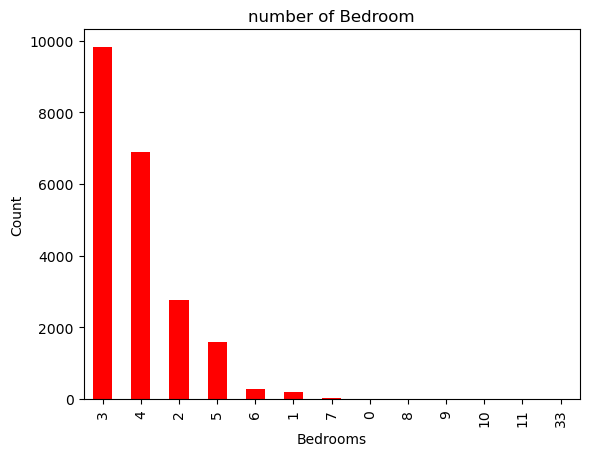

In [12]:
df['bedrooms'].value_counts().plot(kind='bar',color='red')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

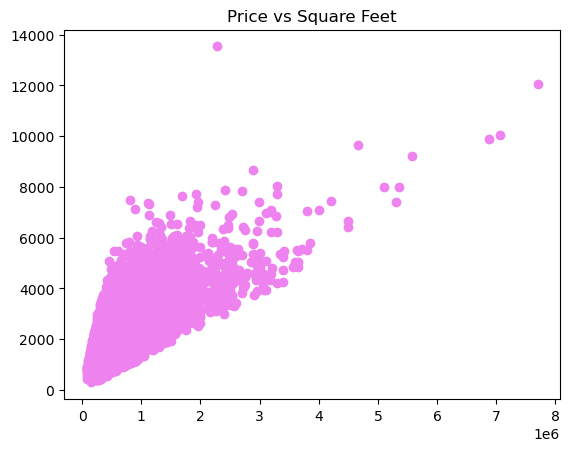

In [13]:
plt.scatter(df.price,df.sqft_living,color='violet')
plt.title("Price vs Square Feet")

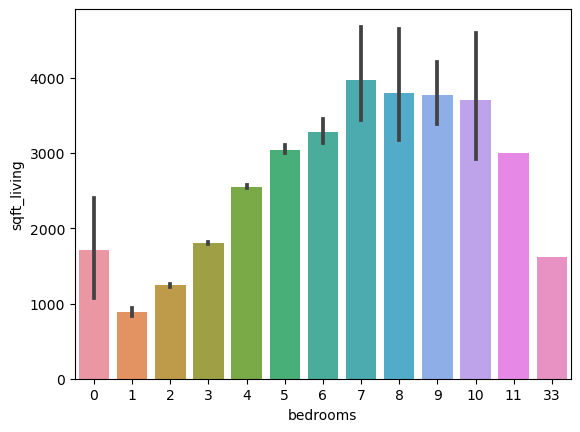

In [14]:
sns.barplot(data=df,x='bedrooms',y='sqft_living')
plt.show()

In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

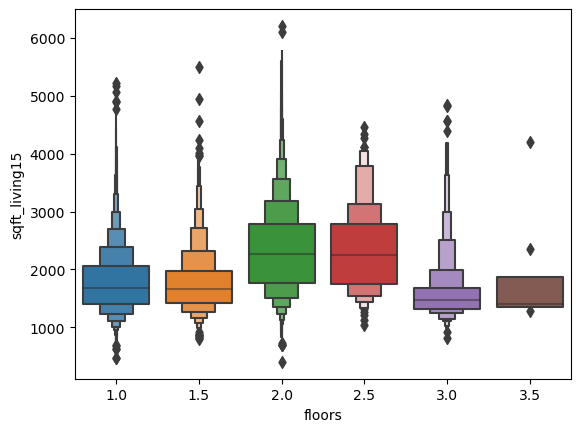

In [16]:
sns.boxenplot(data=df,x='floors',y='sqft_living15')
plt.show()

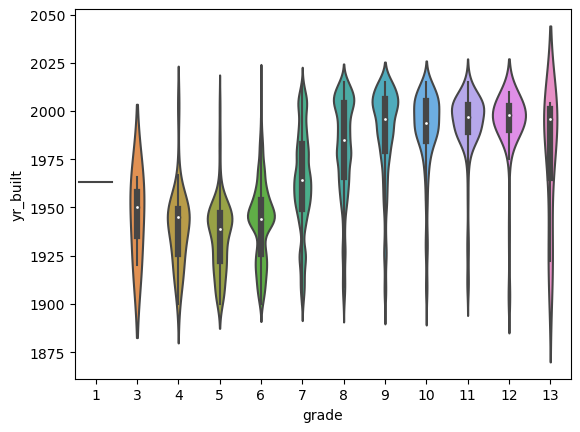

In [17]:
sns.violinplot(data=df,x='grade',y='yr_built')
plt.show()

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

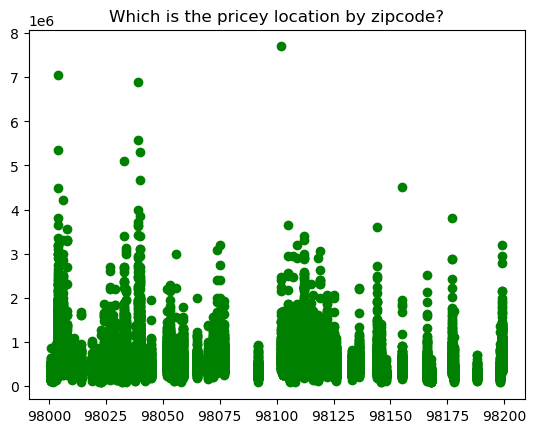

In [18]:
plt.scatter(df.zipcode,df.price,color='green')
plt.title("Which is the pricey location by zipcode?")

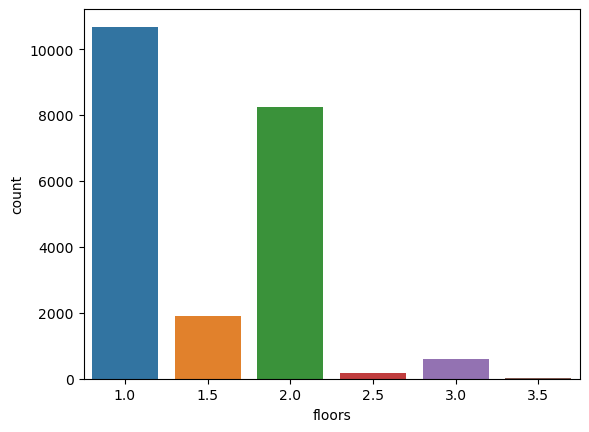

In [19]:
sns.countplot(data=df,x='floors')
plt.show()

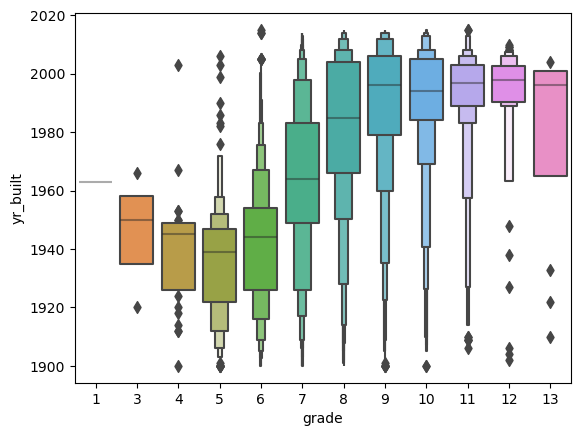

In [20]:
sns.boxenplot(data=df,x='grade',y='yr_built')
plt.show()

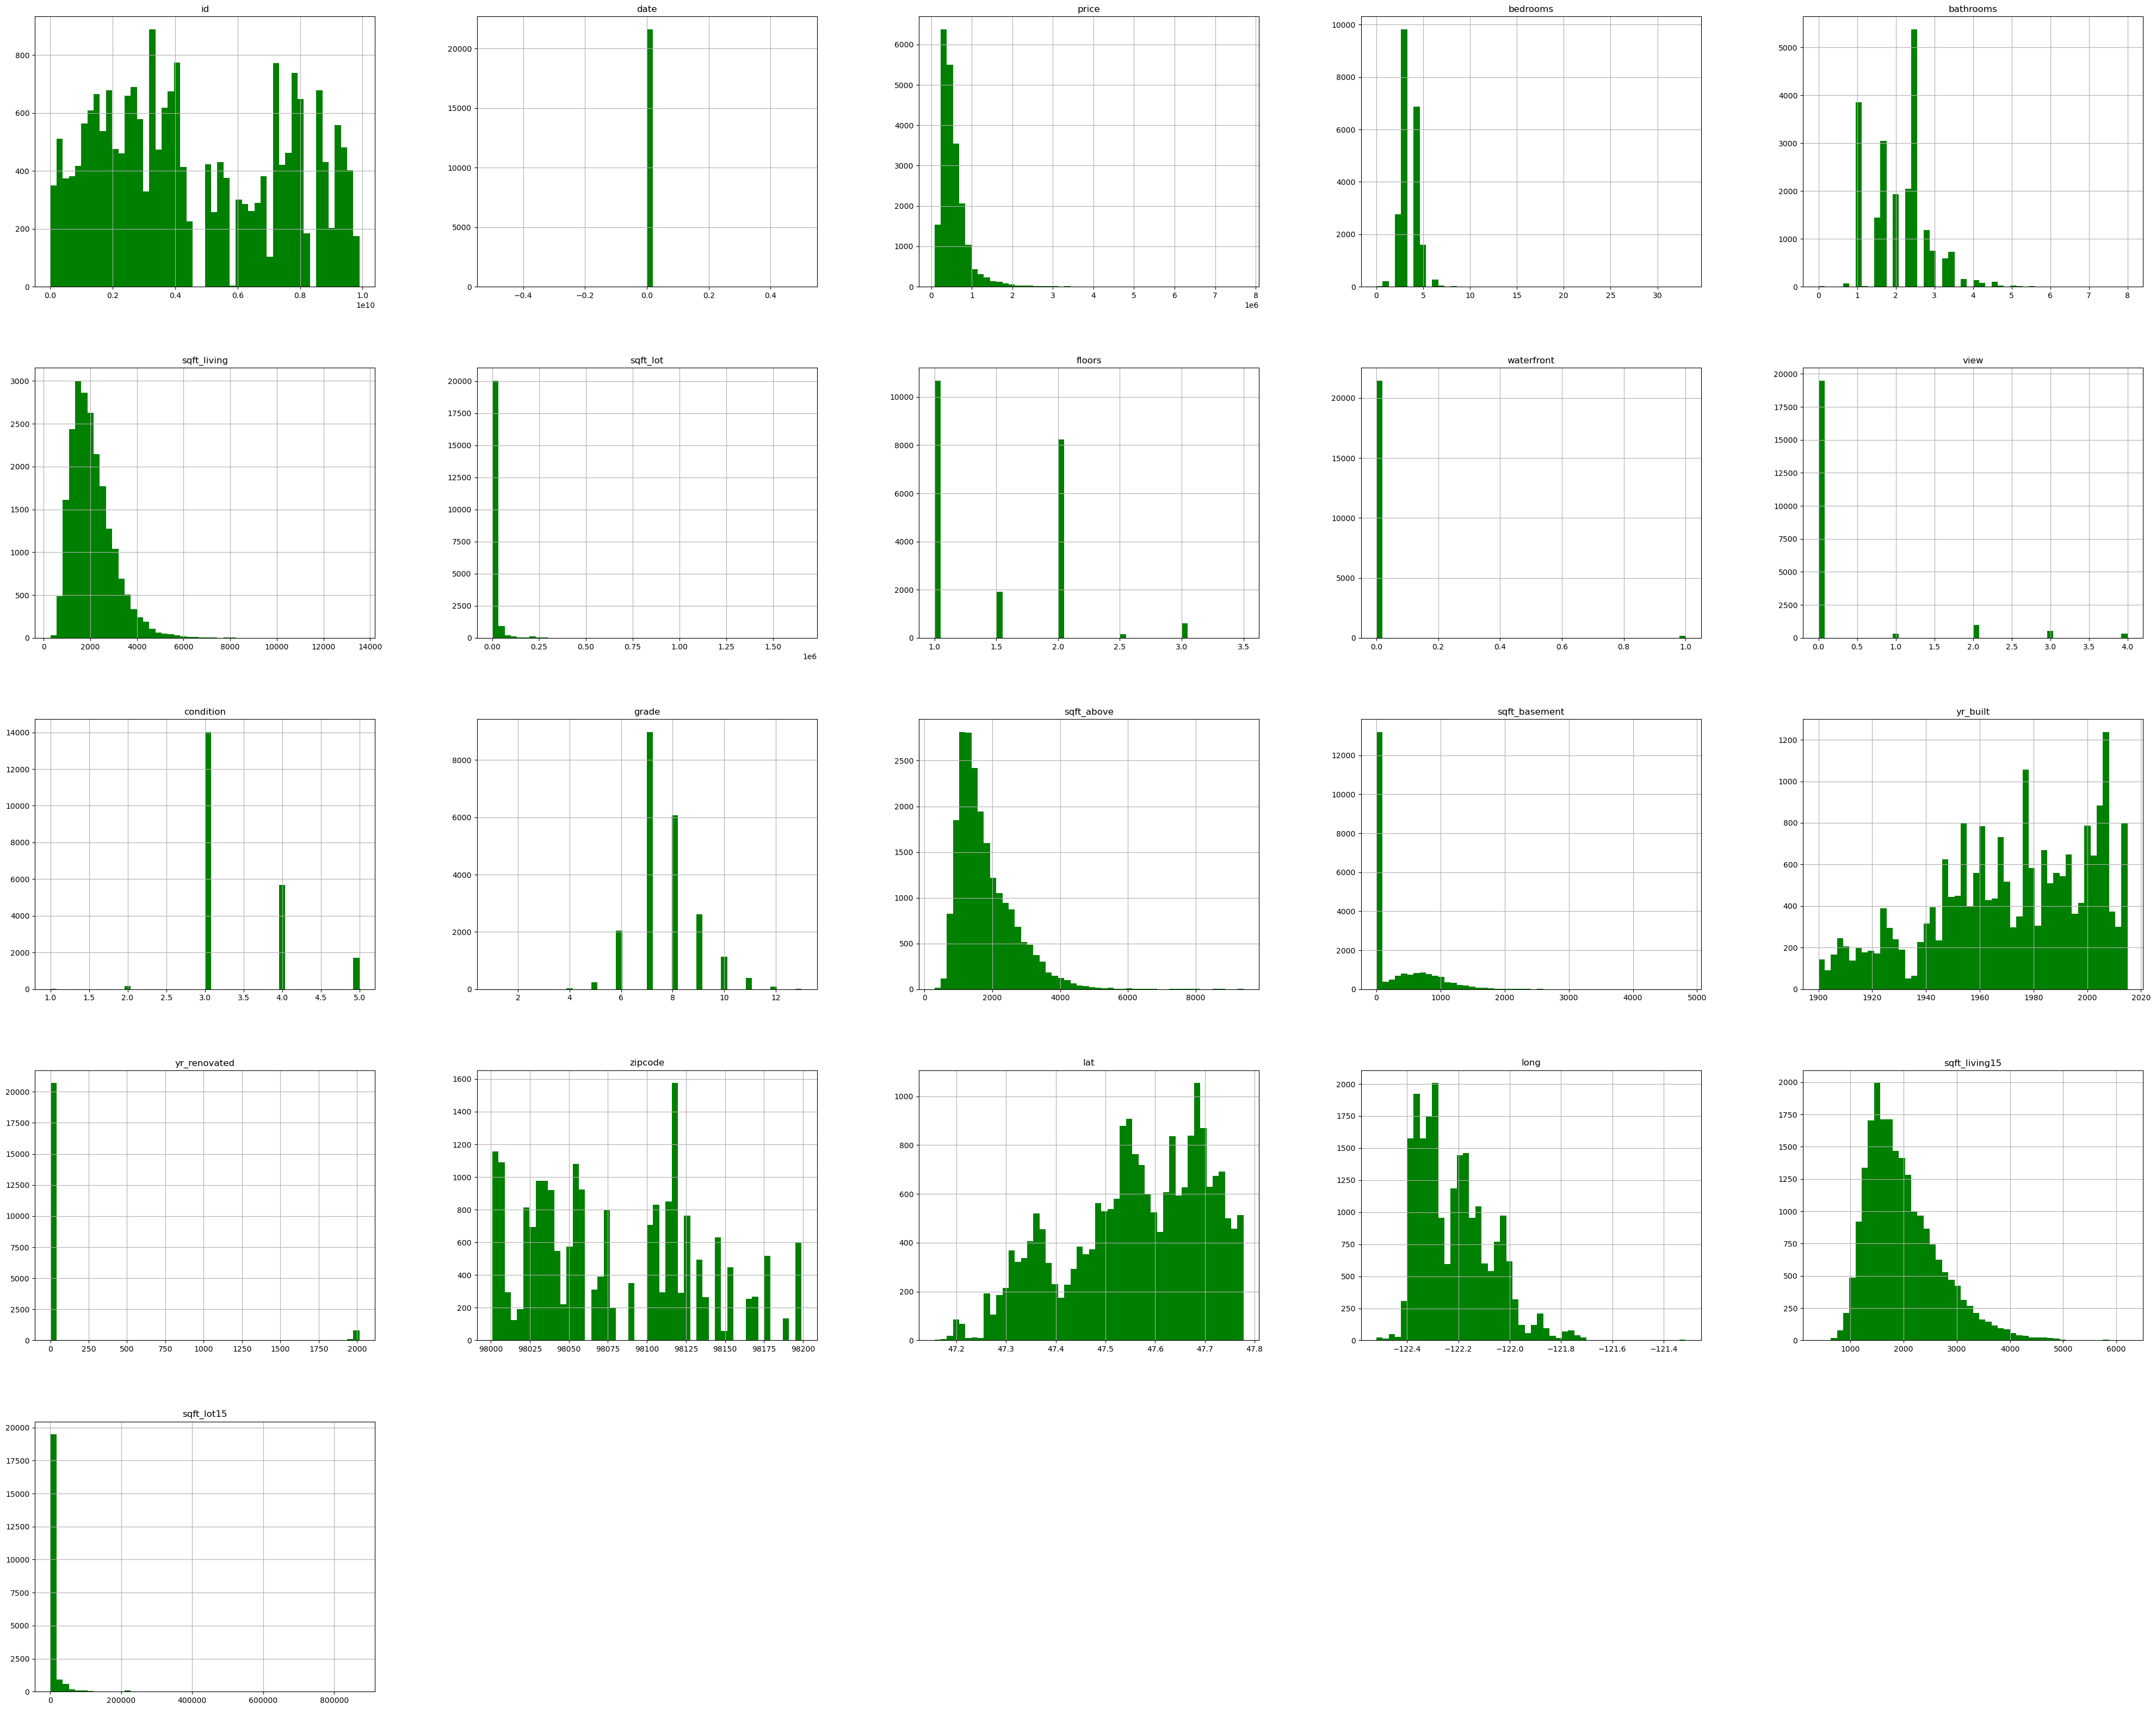

In [37]:
df.hist(bins=50, figsize=(50,40),color='green');

In [22]:
df1 = df.drop(['id', 'price'],axis=1)

In [23]:
df1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()

In [26]:
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
df1 = df.drop(['id', 'price'],axis=1)

In [27]:
x_train , x_test , y_train , y_test = train_test_split(df1 , labels , test_size = 0.10,random_state =2)

In [28]:
x_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12826,0,4,2.50,3910,22710,1.5,0,0,3,8,3910,0,1908,2003,98004,47.6295,-122.217,2920,16544
6410,0,3,1.75,1660,37642,1.0,0,0,4,7,1660,0,1991,0,98022,47.2559,-122.007,2070,54450
15417,0,3,1.50,1190,20672,1.5,0,3,3,7,1190,0,1948,0,98166,47.4459,-122.359,2150,16239
16882,0,3,2.25,2430,73151,1.0,0,0,3,8,2430,0,1974,0,98059,47.4749,-122.092,2800,39250
8467,0,3,1.00,1490,8995,1.0,0,0,4,7,1490,0,1954,0,98168,47.4901,-122.303,1490,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0,2,1.00,720,4222,1.0,0,0,4,5,720,0,1942,0,98056,47.4965,-122.186,860,4785
18898,0,4,2.50,1820,9161,1.0,0,0,4,7,1220,600,1975,0,98058,47.4333,-122.168,1860,7650
11798,0,4,3.25,3440,7661,2.0,0,0,3,11,3440,0,2006,0,98029,47.5429,-121.995,3580,6478
6637,0,2,1.50,870,747,2.0,0,0,3,8,800,70,2004,0,98103,47.6967,-122.342,1710,1280


In [29]:
x_test

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6638,0,4,2.25,2410,4250,1.5,0,0,5,7,1460,950,1929,0,98117,47.6849,-122.376,1360,5074
7366,0,3,1.50,2170,16600,1.0,1,2,3,10,1130,1040,1979,0,98052,47.6307,-122.088,3130,13875
3158,0,2,1.00,1450,6380,1.0,0,0,3,7,1450,0,1967,0,98115,47.6924,-122.321,1240,6380
9117,0,5,3.25,4500,9648,2.0,0,4,4,8,3000,1500,1968,0,98125,47.7262,-122.282,2780,21132
3392,0,2,1.00,860,6000,1.0,0,0,3,6,860,0,1945,0,98022,47.2109,-121.985,1300,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,0,4,2.00,2610,14321,1.5,0,0,4,6,1690,920,1940,0,98188,47.4672,-122.296,1630,8599
3268,0,4,1.75,2360,11300,1.0,0,0,4,9,2360,0,1974,0,98006,47.5728,-122.163,2290,11951
19051,0,3,1.00,1040,9514,1.0,0,0,4,7,1040,0,1969,0,98059,47.4936,-122.102,1040,9514
1486,0,5,2.75,2000,5885,1.0,0,0,3,7,1260,740,1994,0,98023,47.3155,-122.347,1960,6514


In [30]:
y_train

12826    1749000.0
6410      315000.0
15417     375000.0
16882     524000.0
8467      207000.0
           ...    
1099      151000.0
18898     325000.0
11798     905000.0
6637      313000.0
2575      690000.0
Name: price, Length: 19451, dtype: float64

In [31]:
y_test

6638      735000.0
7366     1150000.0
3158      350500.0
9117      860000.0
3392      122000.0
           ...    
3823      294950.0
3268      732000.0
19051     299000.0
1486      229950.0
10955     571000.0
Name: price, Length: 2162, dtype: float64

In [32]:
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
reg.score(x_test,y_test)

0.7320342760357688

In [34]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1)

In [35]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [36]:
clf.score(x_test,y_test)

0.9192281567662756